### 📚 Import Libraries 📚 

In [1]:
# Handle with dataset
import numpy as np 
import pandas as pd 
# Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
# preprocessing 
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split
# modeling 
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.svm import SVC , SVR 
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# evaluation
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# Convert Age type from float to int 
df.person_age = df.person_age.astype(dtype='int64')

In [6]:
# Check nans
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
# check duplicates
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# statistical information about the data
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#### Split Categorical and numerical Data

In [10]:
numerical = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'] 
categoriacl = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

#### Check Outliers

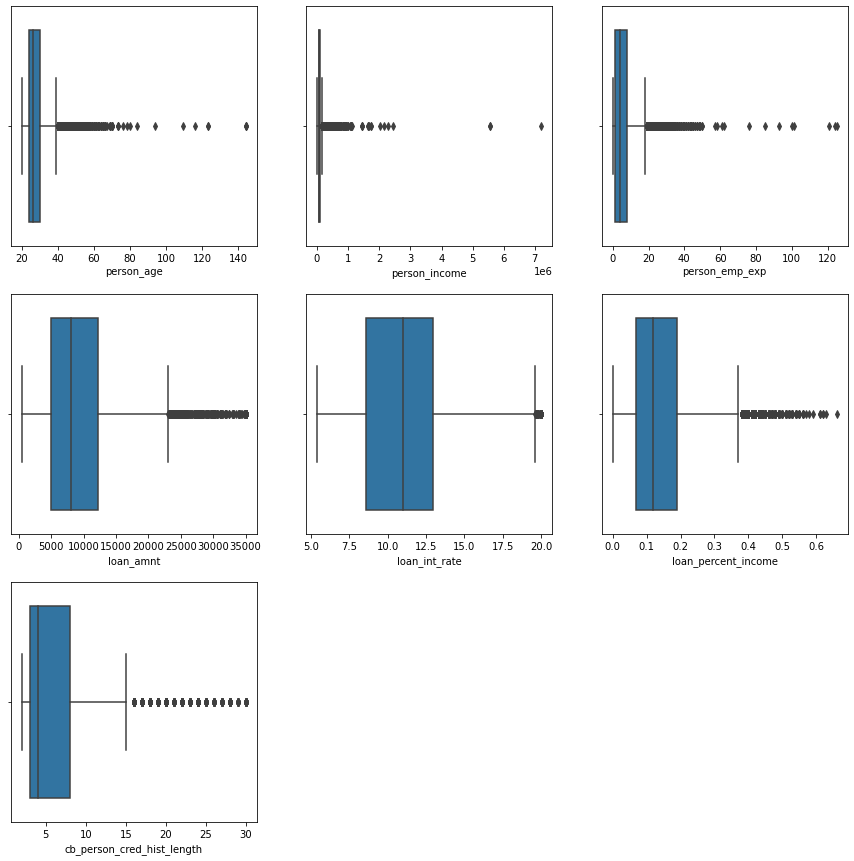

In [11]:
# Boxplot numerical columns 
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),df[numerical]) : 
    plt.subplot(3,3,i)
    sns.boxplot(data = df , x=df[col])
plt.show()

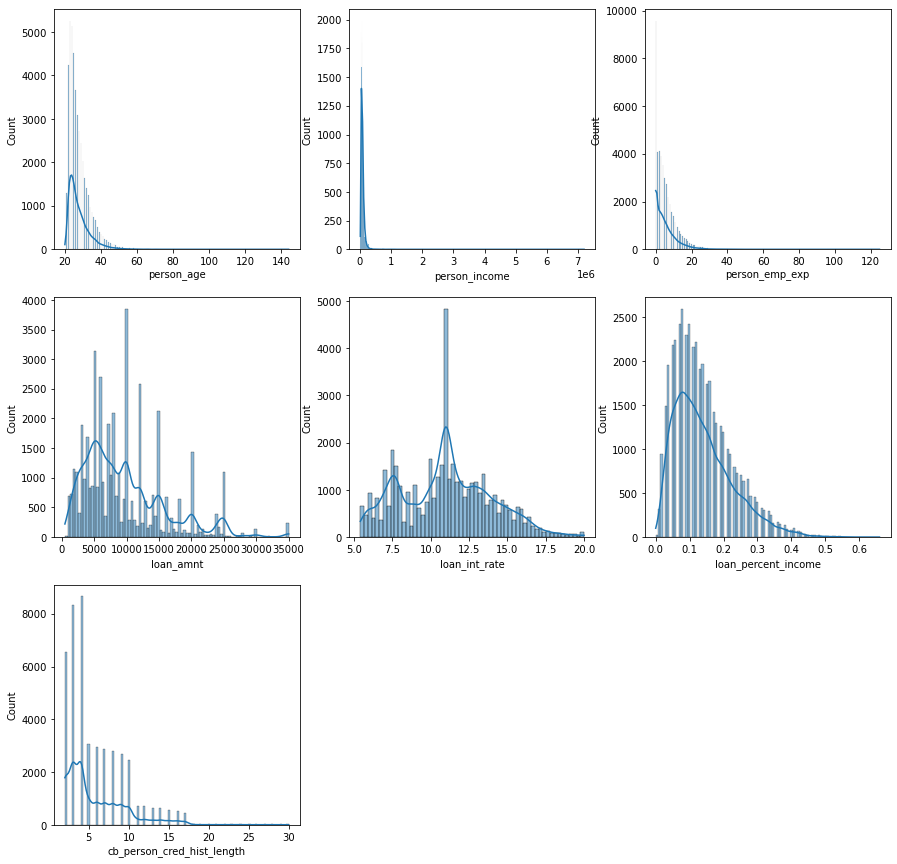

In [12]:
# histplot numerical columns 
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),df[numerical]) : 
    plt.subplot(3,3,i)
    sns.histplot(data = df , x=df[col] , kde=True)
plt.show()

In [13]:
def detect_outliers(df, numerical_cols, lower_factor=1.5, upper_factor=1.5):
    outlier_data = pd.DataFrame()
    all_outliers_idx = set()  # Track indices of outliers

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_factor * IQR
        upper_bound = Q3 + upper_factor * IQR

        if not df.empty:
            print(f"{col}: Min Value = {df[col].min()}, Max Value = {df[col].max()}")
            print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}\n")

        outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        all_outliers_idx.update(outliers.index)  # Store outlier indices
    
    # Separate outliers and cleaned data
    outlier_data = df.loc[list(all_outliers_idx)]
    df_cleaned = df.drop(index=all_outliers_idx)

    print("Outliers detected and stored in 'outlier_data'. Remaining data cleaned.")

    return df_cleaned, outlier_data

In [14]:
# Apply function
dfCleaned, outlierData = detect_outliers(df, numerical , 1.5 , 1.5)

person_age: Min Value = 20, Max Value = 144
person_age: Lower Bound = 15.0, Upper Bound = 39.0

person_income: Min Value = 8000.0, Max Value = 7200766.0
person_income: Lower Bound = -25673.875, Upper Bound = 168667.125

person_emp_exp: Min Value = 0, Max Value = 125
person_emp_exp: Lower Bound = -9.5, Upper Bound = 18.5

loan_amnt: Min Value = 500.0, Max Value = 35000.0
loan_amnt: Lower Bound = -5855.875, Upper Bound = 23093.125

loan_int_rate: Min Value = 5.42, Max Value = 20.0
loan_int_rate: Lower Bound = 1.9899999999999993, Upper Bound = 19.59

loan_percent_income: Min Value = 0.0, Max Value = 0.66
loan_percent_income: Lower Bound = -0.10999999999999999, Upper Bound = 0.37

cb_person_cred_hist_length: Min Value = 2.0, Max Value = 30.0
cb_person_cred_hist_length: Lower Bound = -4.5, Upper Bound = 15.5

credit_score: Min Value = 390, Max Value = 850
credit_score: Lower Bound = 497.5, Upper Bound = 773.5

Outliers detected and stored in 'outlier_data'. Remaining data cleaned.


In [15]:
# Validate total count
print(f"Cleaned Shape: {dfCleaned.shape[0]}")
print(f"Outlier Shape: {outlierData.shape[0]}")
print(f"Sum of Cleaned & Outliers: {dfCleaned.shape[0] + outlierData.shape[0]}")

Cleaned Shape: 37549
Outlier Shape: 7451
Sum of Cleaned & Outliers: 45000


In [16]:
# try to fix ages that has data entry error
adjusted_data = outlierData[outlierData["person_age"] > 100].copy() 
adjusted_data["person_age"] = adjusted_data["person_age"].apply(lambda x: x % 100 if x > 120 else 0)

In [17]:
# Final data
FinalLoanData = pd.concat([dfCleaned,adjusted_data[adjusted_data['person_age']>0 ]])
FinalLoanData

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,21,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,24,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,44,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,44,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,23,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,23,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0


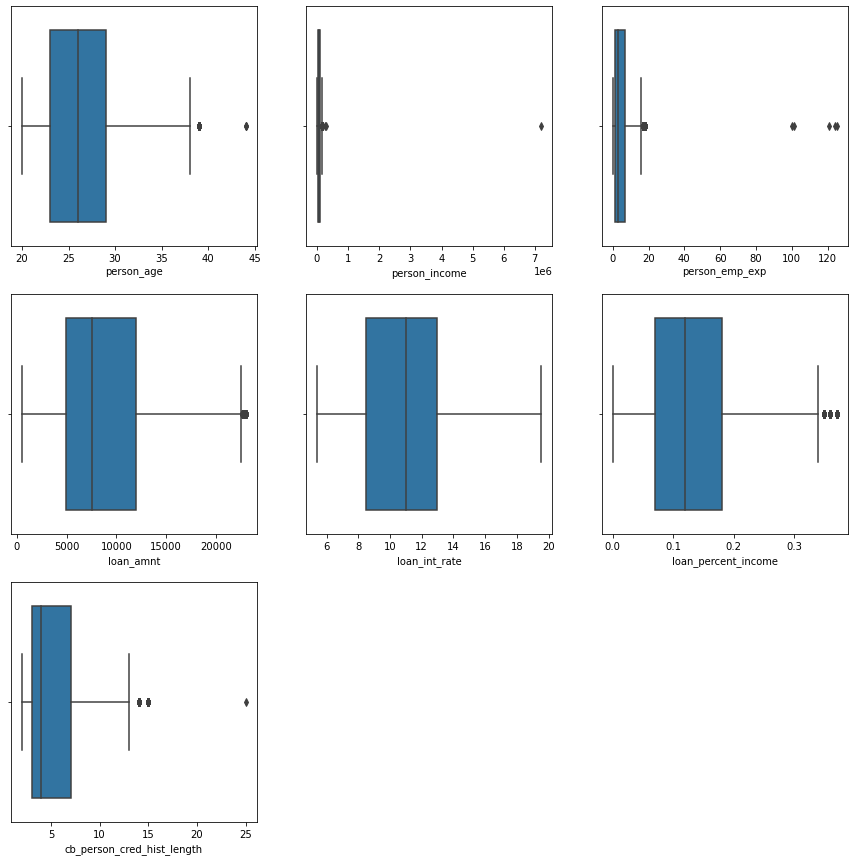

In [18]:
# Boxplot numerical columns after remove outliers
plt.figure(figsize=(15,15))
for i,col in zip(range(1,len(numerical)),FinalLoanData[numerical]) : 
    plt.subplot(3,3,i)
    sns.boxplot(data = FinalLoanData , x=FinalLoanData[col])
plt.show()

### Columns Correlation 

In [19]:
numerical.append('loan_status')
correlation = FinalLoanData[numerical].corr()

<Figure size 720x720 with 0 Axes>

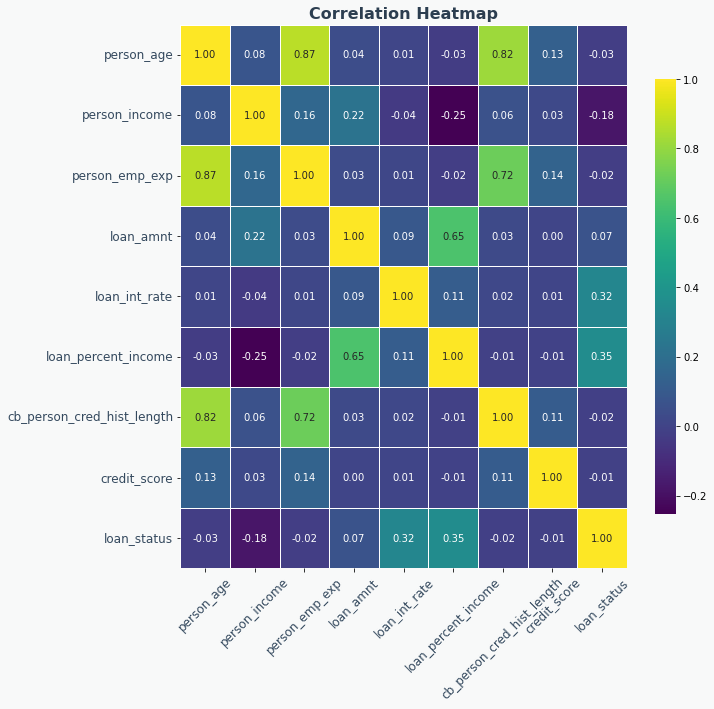

In [20]:
plt.figure(figsize=(10, 10), facecolor="#F8F9F9")  

custom_cmap = sns.color_palette("viridis", as_cmap=True) 

plt.figure(figsize=(10, 10), facecolor="#F8F9F9")  

ax = sns.heatmap(
    correlation, 
    annot=True, 
    cmap=custom_cmap,  
    linewidths=0.5, 
    linecolor="white", 
    fmt=".2f", 
    cbar_kws={"shrink": 0.8} 
)

ax.set_facecolor("#ECF0F1")  
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold", color="#2C3E50")
plt.xticks(fontsize=12, color="#34495E", rotation=45)
plt.yticks(fontsize=12, color="#34495E")
plt.grid(False)

plt.show()

### DATA PREPROCESSING


In [21]:
encode = LabelEncoder()

In [22]:
for col in categoriacl : 
    FinalLoanData[col] = encode.fit_transform(FinalLoanData[col])

### SPLITTING THE DATA

In [23]:
X = FinalLoanData.drop(columns=['loan_status','loan_percent_income'] , axis=1)
Y = FinalLoanData['loan_status']

In [24]:
xtrain , xtest , ytrain , ytest = train_test_split(X,Y , test_size=0.25 , random_state=42)

### SCALLING

In [25]:
scaler = StandardScaler()

In [26]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [27]:
xtrain = pd.DataFrame(xtrain , columns=FinalLoanData.columns[:12])
xtest = pd.DataFrame(xtest , columns=FinalLoanData.columns[:12])

#### CLASSIFICATION

In [28]:
# define the Models
ClassificationModels = {
    'Logisitic Regression' : LogisticRegression() ,
    'Random Forest' : RandomForestClassifier() , 
    'Descion Tree': DecisionTreeClassifier() , 
    'SVC' : SVC() , 
    'XGBoost' : XGBClassifier()
}

In [29]:
# Train the models
for name, model in ClassificationModels.items():
    model.fit(xtrain, ytrain)
    print(f"{name} model has been trained successfully!")

Logisitic Regression model has been trained successfully!
Random Forest model has been trained successfully!
Descion Tree model has been trained successfully!
SVC model has been trained successfully!
XGBoost model has been trained successfully!


In [30]:
# Evaluate the models
for name, model in ClassificationModels.items():
    modelPredictionForTrain = model.predict(xtrain)
    modelPredictionForTest = model.predict(xtest)
    print(name , " train Score by score Func = " , model.score(xtrain,ytrain))
    print(name , " test Score by score Func = " , model.score(xtest,ytest))
    print(name , " train Score by acc score Func = " , accuracy_score(ytrain,modelPredictionForTrain))
    print(name , " test Score by acc score Func = " , accuracy_score(ytest,modelPredictionForTest))
    print("Model Classification Report\n")
    print(classification_report(ytest,modelPredictionForTest))
    print("--------------------------------------------------------")

Logisitic Regression  train Score by score Func =  0.8828333037457837
Logisitic Regression  test Score by score Func =  0.8834806688678241
Logisitic Regression  train Score by acc score Func =  0.8828333037457837
Logisitic Regression  test Score by acc score Func =  0.8834806688678241
Model Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7404
           1       0.72      0.73      0.73      1985

    accuracy                           0.88      9389
   macro avg       0.82      0.83      0.83      9389
weighted avg       0.88      0.88      0.88      9389

--------------------------------------------------------
Random Forest  train Score by score Func =  0.9999644949405291
Random Forest  test Score by score Func =  0.9218234103738417
Random Forest  train Score by acc score Func =  0.9999644949405291
Random Forest  test Score by acc score Func =  0.9218234103738417
Model Classification Report

              

In [31]:

# Features and target for regression
X = FinalLoanData.drop(columns=['loan_status', 'loan_int_rate'])
y = FinalLoanData['loan_int_rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train regression models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
}

print("\n--- Loan Interest Rate Prediction ---")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"{name}: RMSE = {rmse:.2f}, R² Score = {r2:.4f}")




--- Loan Interest Rate Prediction ---
LinearRegression: RMSE = 2.81, R² Score = 0.0667
RandomForestRegressor: RMSE = 2.79, R² Score = 0.0807
DecisionTreeRegressor: RMSE = 3.98, R² Score = -0.8720
